# **Trabajo Práctico N°1**

### Organización de Datos - Primer Cuatrimestre 2018
#### Facultad de Ingenieria UBA

![LOGO](http://fi.uba.ar/sites/default/files/logoBlanco_footer.png)

**Integrantes:** Agustín Blacker, Augusto Kielbowicz, Brian Litwak, Ada Zamora

# Introducción

En el siguiente trabajo se analizan datos sobre las busquedas laborales realizados en el sitio de [Zonajobs]. Los datos fueron otorgados por Navent.

El objetivo del estudio es poder brindar informacion relevante abstraidos de dichos datos.

Cabe aclarar que las tablas brindadas no estaban normalziadas ni filtradas, por lo que se tuvo que hacer una exaustiva limpieza de las mismas.

[Zonajobs]:https://www.zonajobs.com.ar/

La versión digital de este trabajo se encuentra en 

Github:

https://nbviewer.jupyter.org/github/akielbowicz/7506-organizacion_de_datos_fiuba/blob/master/TP1.ipynb

Colaboratory:

https://colab.research.google.com/drive/1z23OexHn-JSkwkOs2-j_eZndSnljf3wY

# PREPARACIÓN DE AMBIENTE DE TRABAJO

**Aviso!** Esta primera celda se utiliza unicamente si se trabaja desde [Google Colaboratory][Colab-link]. 

[Colab-link]: https://colab.research.google.com

In [0]:
#@title
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip3 install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1K4uRag5nmGtfuvzyJV9RL_73lzsh_iTO'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

downloaded.GetContentFile('datos_navent_fiuba.tar')

# Descomprimimos y verificamos los datasets 
!tar -xvf datos_navent_fiuba.tar
!ls datos_navent_fiuba/

# Para leer los TERMINOS y CONDICIONES de los datasets
# !cat datos_navent_fiuba/TERMINOS.txt

## Librerías
Importamos las librerías que vamos a utilizar y configuramos el ambiente

In [0]:
!pip install -q altair==2.0.0rc2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

%matplotlib inline
sns.set(context='notebook',color_codes=True)

# Para mostrar unicamente 10 filas cada vez que se realice un print 
# de un elemento de Pandas
pd.options.display.max_rows = 10

# Cuando se trabaja en Colab correr este comando una vez por sesión
alt.renderers.enable('colab')

# Unidad 1 : Limpieza de datos
<a id="Unidad1"></a>

Como primer paso importamos los datos y realizamos un primer análisis observando el contenido
de cada uno de los *sets* de datos.

## 1.1 Importar Datos
Se cargan los datos y se redefinen los nombres de cada *dataframe*. Con esto logramos entender mejor los datos que tienen cada uno.


In [0]:
postulantes_educacion = pd.read_csv('datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
postulantes_genero_edad = pd.read_csv('datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
visitas = pd.read_csv('datos_navent_fiuba/fiuba_3_vistas.csv')
postulaciones = pd.read_csv('datos_navent_fiuba/fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('datos_navent_fiuba/fiuba_5_avisos_online.csv')
avisos_detalle = pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle.csv')


### 1.1.1 Renombramos Columnas
Nos permite trabajar más comodamente, dado que referenciamos los atributos de manera intuitiva. 

In [0]:
postulantes_educacion = postulantes_educacion.rename(index=str,columns={"idpostulante": "id_postulante", "nombre":"nivel_educacion"});
postulantes_genero_edad = postulantes_genero_edad.rename(index=str, columns={"idpostulante": "id_postulante", "fechanacimiento":"fecha_nacimiento"})
visitas = visitas.rename(index=str,columns={"idAviso":"id_aviso", "idpostulante": "id_postulante", "timestamp":"fecha_visita"});
avisos_detalle = avisos_detalle.rename(index=str, columns={"idaviso":"id_aviso", "titulo":"titulo_aviso", "descripcion":"descripcion_aviso","nombre_zona":"zona_de_trabajo","mapacalle":"direccion","nombre_area":"nombre_area_laboral","denominacion_empresa":"nombre_empresa"});
avisos_online = avisos_online.rename(index=str, columns={"idaviso":"id_aviso"})
postulaciones = postulaciones.rename(index = str, columns={"idaviso":"id_aviso", "idpostulante":"id_postulante", "fechapostulacion":"fecha_postulacion"})


##1.2 Exploración de los datos
Buscamos conocer el tipo de dato y su descripción. Para ello creamos una función *describir_dataframe* para luego replicarlo para cada dataframe.


Creamos funcion *describir_frame* para entender los *dataframes* involucrados. 

In [0]:
def describir_dataframe(df):
    '''Muestra caracteristicas basicas de un DataFrame'''
    print('-Información general:\n')
    df.info()
    print('\n- Descripción de las columnas:\n')
    print(df.describe(include='all'),'\n')
    print('- Muestra del DataFrame:\n')
    print(df.head(5))
    return

A partir de la descripción del dataframe vemos que cambios podemos realizar al mismo,
ya sea cambio de nombres, cambio de tipo de dato y control de valores nulos. Dicho cambio, también, se fueron logrando en la medida de la necesidad del equipo para poder hacer las visualizaciones.

#### 1.2.1.a Analizamos : postulantes_educacion

In [7]:
describir_dataframe(postulantes_educacion)

-Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 298231 entries, 0 to 298230
Data columns (total 3 columns):
id_postulante      298231 non-null object
nivel_educacion    298231 non-null object
estado             298231 non-null object
dtypes: object(3)
memory usage: 9.1+ MB

- Descripción de las columnas:

       id_postulante nivel_educacion    estado
count         298231          298231    298231
unique        188752               7         3
top           YlMLGD      Secundario  Graduado
freq               9          110256    194474 

- Muestra del DataFrame:

  id_postulante nivel_educacion    estado
0          NdJl        Posgrado  En Curso
1          8BkL   Universitario  En Curso
2          1d2B   Universitario  En Curso
3          NPBx   Universitario  En Curso
4          NPBx          Master  En Curso


**OBSERVACIÓN** Vemos que el *dataframe* tiene 3 columnas. Tanto *nombre* como *estado* son columnas categóricas
dado que toman pocos valores únicos, por lo cual podemos cambiarle el tipo de dato (de *object* a *category*).

Tambien se ve que hay **id_postulante** repetidos por lo que es necesario ver por qué motivo ocurre esto.

In [8]:
postulantes_educacion = postulantes_educacion.astype(dtype={'nivel_educacion':'category','estado':'category'})
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298231 entries, 0 to 298230
Data columns (total 3 columns):
id_postulante      298231 non-null object
nivel_educacion    298231 non-null category
estado             298231 non-null category
dtypes: category(2), object(1)
memory usage: 5.1+ MB


**CONCLUSIÓN** Validamos que se haya realizado el cambio. Y vemos como la memoria se redujo.

#### 1.2.1.b Analizamos : postulantes_genero_edad





In [9]:
describir_dataframe(postulantes_genero_edad)

-Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 200888 entries, 0 to 200887
Data columns (total 3 columns):
id_postulante       200888 non-null object
fecha_nacimiento    196138 non-null object
sexo                200888 non-null object
dtypes: object(3)
memory usage: 6.1+ MB

- Descripción de las columnas:

       id_postulante fecha_nacimiento    sexo
count         200888           196138  200888
unique        200888            15027       3
top          jk58JK6       1991-06-20     FEM
freq               1               57  101981 

- Muestra del DataFrame:

  id_postulante fecha_nacimiento  sexo
0          NM5M       1970-12-03   FEM
1          5awk       1962-12-04   FEM
2          ZaO5       1978-08-10   FEM
3          NdJl       1969-05-09  MASC
4          eo2p       1981-02-16  MASC


**CONCLUSIÓN** Hay tantos **id_postulante** como valores únicos, lo que indica que no hay *repetidos*.

In [10]:
postulantes_genero_edad = postulantes_genero_edad.astype(dtype={'sexo':'category'})
postulantes_genero_edad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200888 entries, 0 to 200887
Data columns (total 3 columns):
id_postulante       200888 non-null object
fecha_nacimiento    196138 non-null object
sexo                200888 non-null category
dtypes: category(1), object(2)
memory usage: 4.8+ MB


En el paso anterior no convertimos la columna *fecha_nacimiento* porque hay que hacer un análisis más detallado dado que las filas no tienen el mismo formato. 

In [11]:
print('Fechas ordenadas en orden ascendente, mostrando los nulos primero:\n')
print(postulantes_genero_edad['fecha_nacimiento'].value_counts(dropna=False).sort_index(na_position='first').head(10))
print('Fechas ordenadas en orden descendente:\n')
print(postulantes_genero_edad['fecha_nacimiento'].value_counts().sort_index(ascending=False).head(10))

Fechas ordenadas en orden ascendente, mostrando los nulos primero:

NaN           4750
0004-07-19       1
0011-03-08       1
0012-11-04       1
0024-02-09       1
0029-05-11       1
0031-12-11       1
0033-09-14       1
1775-07-09       1
1917-07-08       1
Name: fecha_nacimiento, dtype: int64
Fechas ordenadas en orden descendente:

2006-01-01    1
2000-12-31    1
2000-12-28    1
2000-12-27    1
2000-12-12    1
2000-12-07    1
2000-11-28    1
2000-11-27    1
2000-11-26    1
2000-11-07    1
Name: fecha_nacimiento, dtype: int64


**OBSERVACIÓN** : Revisamos los datos ordenados, para ver si hay registros anomalos. Dado que éstos se ubican en los extremos cuando se los ordena. 

In [12]:
print('Hay un {:.2f}% de valores nulos'.format(postulantes_genero_edad['fecha_nacimiento'].isna().mean() * 100))

Hay un 2.36% de valores nulos


**CONCLUSIÓN** Al tener 2.36 % de los datos con NaN, notamos que no hay gran proporción que pueda afectar en los resultados futuros de análisis.

**DECISIÓN** : Se decide mantener en el *dataframe* los valores NaN para no alterar la fuente y mostrar el coportamiento de las mismas en relación a los datos correctamente tomados.

Para saber si podemos tirar los datos que no tienen el formato correcto vemos el resto de las columnas

In [13]:
print(postulantes_genero_edad.sort_values(by=['fecha_nacimiento']).head(10),'\n')
print(postulantes_genero_edad.sort_values(by=['fecha_nacimiento'],ascending=False).head(1))


       id_postulante fecha_nacimiento        sexo
148638       GNZOvAv       0004-07-19        MASC
149653       1QPQ8QL       0011-03-08        MASC
145683       dYjV0rb       0012-11-04  NO_DECLARA
130846       8M2R6pz       0024-02-09         FEM
71458        LN85Y3b       0029-05-11        MASC
56206        xkPwXwY       0031-12-11         FEM
141832       A36Npjj       0033-09-14         FEM
154559       xkdvwm0       1775-07-09        MASC
164618       96X1loa       1917-07-08        MASC
156483       4rP8l0R       1921-08-18         FEM 

     id_postulante fecha_nacimiento  sexo
6869        a5qWAm       2006-01-01  MASC


**OBSERVACIÓN :** la primer fecha de nacimiento es coincide con el [Council of War](https://founders.archives.gov/documents/Washington/03-01-02-0045), con la dirección de una casa bastante bizzarra en  
[Lanús](https://encrypted.google.com/maps/place/C1092,+Av.+9+de+Julio+1775,+B1824KKQ+Lanús+Este,+Buenos+Aires/@-34.7125301,-58.3863253,17z/data=!3m1!4b1!4m5!3m4!1s0x95bccd3a19b52e5f:0x478bb3a3c0651908!8m2!3d-34.7125345!4d-58.3841366?hl=en) y con la dirección del
[Ministerio de Salud](https://encrypted.google.com/maps/place/C1092,+Av.+9+de+Julio+1775,+C1092+CABA/@-34.612109,-58.3834105,17z/data=!3m1!4b1!4m5!3m4!1s0x95bccad0cc5fe421:0x5b5478bd8c558716!8m2!3d-34.6121134!4d-58.3812218?hl=en) de la Nación. 

Anotamos el *id_postulante* para futuras exploraciones: **xkdvwm0**

Similar para el más joven: **a5qWAm**.

Tranformamos las fechas con la función `to_datetime` con la opción `errors='coerce'` para que reemplace las fechas no válidas con `NaT`

In [14]:
postulantes_genero_edad['fecha_nacimiento'] = pd.to_datetime(postulantes_genero_edad['fecha_nacimiento'],format='%Y-%m-%d',
              errors='coerce')

print(postulantes_genero_edad['fecha_nacimiento'].value_counts(dropna=False).sort_index(),'\n')

postulantes_genero_edad.info()

1775-07-09       1
1917-07-08       1
1921-08-18       1
1939-07-27       1
1941-09-21       1
              ... 
2000-12-27       1
2000-12-28       1
2000-12-31       1
2006-01-01       1
NaT           4757
Name: fecha_nacimiento, Length: 15021, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Index: 200888 entries, 0 to 200887
Data columns (total 3 columns):
id_postulante       200888 non-null object
fecha_nacimiento    196131 non-null datetime64[ns]
sexo                200888 non-null category
dtypes: category(1), datetime64[ns](1), object(1)
memory usage: 4.8+ MB


Vemos que el número de filas nulas incrementó en el número correcto.

#### 1.2.1.c Analizamos : visitas





In [15]:
describir_dataframe(visitas)

-Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 961897 entries, 0 to 961896
Data columns (total 3 columns):
id_aviso         961897 non-null int64
fecha_visita     961897 non-null object
id_postulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 29.4+ MB

- Descripción de las columnas:

            id_aviso                  fecha_visita id_postulante
count   9.618970e+05                        961897        961897
unique           NaN                        960220         87443
top              NaN  2018-02-26T12:22:26.834-0500       dYJV5K2
freq             NaN                             3           595
mean    1.111350e+09                           NaN           NaN
...              ...                           ...           ...
min     1.585950e+06                           NaN           NaN
25%     1.112311e+09                           NaN           NaN
50%     1.112347e+09                           NaN           NaN
75%     1.112360e+0

**OBSERVACION :** Algo raro en la descripción de las columnas es que no se muestra el número de valores únicos para 
**id_aviso**. Por lo cual analizamos esta columna por separado.

In [16]:
with pd.option_context('display.max_rows', 25):
  print(visitas['id_aviso'].value_counts().sort_index(),'\n');
  print(visitas['id_aviso'].value_counts().sort_values(),'\n');

1585950         1
1672250         2
1799300         1
2613010         4
3006520         1
5791240         1
9240880         1
12543760      384
12812680       89
17903700        1
1000150677      2
1000365835     30
             ... 
1112369825     77
1112369859     21
1112369871     76
1112369975     80
1112370361     15
1112370424      2
1112370431      7
1112370440      8
1112370444     10
1112370451     43
1112370471    136
1112370500      5
Name: id_aviso, Length: 7458, dtype: int64 

1111501585       1
1112210271       1
1111917871       1
1111962454       1
1111799543       1
1002308544       1
1112228989       1
1111562551       1
1112247394       1
1112217207       1
1112194127       1
1112054545       1
              ... 
1112359880    2659
1112364849    2768
1112334791    2817
1112345900    2841
1112346591    2979
1112369306    3236
1112344973    3299
1112355872    3472
1112366909    3669
1112352317    4003
1112359836    4120
1112363488    4169
Name: id_aviso, Length: 7458, 

Con eso vemos que solo hay 7458 avisos distintos 

In [17]:
with pd.option_context('display.max_rows', 20):
  print(visitas['fecha_visita'].value_counts().sort_index(),'\n');
  print(visitas['fecha_visita'].value_counts().sort_values());

2018-02-23T13:38:10.808-0500    1
2018-02-23T13:38:12.173-0500    1
2018-02-23T13:38:12.581-0500    1
2018-02-23T13:38:12.790-0500    1
2018-02-23T13:38:12.945-0500    1
2018-02-23T13:38:13.187-0500    1
2018-02-23T13:38:13.269-0500    1
2018-02-23T13:38:13.343-0500    1
2018-02-23T13:38:13.849-0500    1
2018-02-23T13:38:14.296-0500    1
                               ..
2018-02-28T23:59:48.212-0500    1
2018-02-28T23:59:49.344-0500    1
2018-02-28T23:59:50.844-0500    1
2018-02-28T23:59:52.754-0500    1
2018-02-28T23:59:54.532-0500    1
2018-02-28T23:59:55.409-0500    1
2018-02-28T23:59:55.535-0500    1
2018-02-28T23:59:55.636-0500    1
2018-02-28T23:59:56.142-0500    1
2018-02-28T23:59:56.812-0500    1
Name: fecha_visita, Length: 960220, dtype: int64 

2018-02-24T11:54:41.236-0500    1
2018-02-26T18:32:15.609-0500    1
2018-02-25T08:15:47.337-0500    1
2018-02-26T15:23:00.862-0500    1
2018-02-28T21:21:29.019-0500    1
2018-02-28T06:16:27.156-0500    1
2018-02-27T15:51:56.150-0500   

In [18]:
#Transformamos el formato fecha_visita  de visitas

fecha_visita = pd.to_datetime(visitas['fecha_visita'])
visitas['timestamp_visita'] = fecha_visita
visitas['fecha_visita'] = fecha_visita.dt.date
visitas['horario_visita'] = fecha_visita.dt.time
visitas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961897 entries, 0 to 961896
Data columns (total 5 columns):
id_aviso            961897 non-null int64
fecha_visita        961897 non-null object
id_postulante       961897 non-null object
timestamp_visita    961897 non-null datetime64[ns]
horario_visita      961897 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 44.0+ MB


#### 1.2.1.d Analizamos : postulaciones


In [19]:
describir_dataframe(postulaciones)

-Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
id_aviso             int64
id_postulante        object
fecha_postulacion    object
dtypes: int64(1), object(2)
memory usage: 103.8+ MB

- Descripción de las columnas:

            id_aviso id_postulante    fecha_postulacion
count   3.401623e+06       3401623              3401623
unique           NaN        200888              1940105
top              NaN        axmjOE  2018-01-17 07:03:36
freq             NaN          3166                   25
mean    1.111432e+09           NaN                  NaN
...              ...           ...                  ...
min     8.725750e+06           NaN                  NaN
25%     1.112261e+09           NaN                  NaN
50%     1.112293e+09           NaN                  NaN
75%     1.112327e+09           NaN                  NaN
max     1.112370e+09           NaN                  NaN

[11 rows x 3 columns] 

- Mue

In [20]:
with pd.option_context('display.max_rows', 20):
  print(postulaciones['id_aviso'].value_counts(dropna=False).sort_index(),'\n');
  print(postulaciones['id_aviso'].value_counts().sort_values(),'\n');

8725750       117
11740890        7
12543760      986
12812680      115
1000132160     11
1000365356    256
1000365835     96
1000371968     15
1000375329    310
1000467083     21
             ... 
1112369871     59
1112369975     27
1112370361      5
1112370424      2
1112370431      5
1112370440      4
1112370444      8
1112370451     18
1112370471     39
1112370500      7
Name: id_aviso, Length: 12692, dtype: int64 

1112202245       1
1111384250       1
1112206657       1
1112214026       1
1112216914       1
1112203301       1
1112055307       1
1112308130       1
1112206193       1
1112206199       1
              ... 
1112296264    6968
1112305277    7153
1112262494    7541
1112298966    7637
1112319451    8025
1112345900    8304
1112094756    8763
1112204682    9244
1112334791    9787
1112033906    9932
Name: id_aviso, Length: 12692, dtype: int64 



In [21]:
fecha_postulacion = pd.to_datetime(postulaciones['fecha_postulacion'])
postulaciones['timestamp_postulacion'] = fecha_postulacion
postulaciones['fecha_postulacion'] = fecha_postulacion.dt.date
postulaciones['horario_postulacion'] = fecha_postulacion.dt.time
postulaciones.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3401623 entries, 0 to 3401622
Data columns (total 5 columns):
id_aviso                 int64
id_postulante            object
fecha_postulacion        object
timestamp_postulacion    datetime64[ns]
horario_postulacion      object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 155.7+ MB


#### 1.2.1.e Analizamos : avisos_online


In [22]:
describir_dataframe(avisos_online)

-Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 5028 entries, 0 to 5027
Data columns (total 1 columns):
id_aviso    5028 non-null int64
dtypes: int64(1)
memory usage: 78.6+ KB

- Descripción de las columnas:

           id_aviso
count  5.028000e+03
mean   1.111264e+09
std    2.337306e+07
min    1.254376e+07
25%    1.112324e+09
50%    1.112350e+09
75%    1.112371e+09
max    1.112389e+09 

- Muestra del DataFrame:

     id_aviso
0  1112355872
1  1112335374
2  1112374842
3  1111984070
4  1111822480


In [23]:
print(avisos_online['id_aviso'].value_counts().sort_values())

1112381437    1
1112372237    1
1112340465    1
1112374284    1
1112132555    1
             ..
1112365079    1
1112377369    1
1112377373    1
1112341196    1
1112383488    1
Name: id_aviso, Length: 5028, dtype: int64


#### 1.2.1.f Analizamos : avisos_detalle


In [24]:
describir_dataframe(avisos_detalle)

-Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 13534 entries, 0 to 13533
Data columns (total 11 columns):
id_aviso               13534 non-null int64
idpais                 13534 non-null int64
titulo_aviso           13534 non-null object
descripcion_aviso      13534 non-null object
zona_de_trabajo        13534 non-null object
ciudad                 47 non-null object
direccion              872 non-null object
tipo_de_trabajo        13534 non-null object
nivel_laboral          13534 non-null object
nombre_area_laboral    13534 non-null object
nombre_empresa         13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.2+ MB

- Descripción de las columnas:

            id_aviso   idpais  \
count   1.353400e+04  13534.0   
unique           NaN      NaN   
top              NaN      NaN   
freq             NaN      NaN   
mean    1.110816e+09      1.0   
...              ...      ...   
min     1.585950e+06      1.0   
25%     1.112222e+09      1.0   
50%  

**ANALISIS** Busco entender la columna *ciudad* dado que veo algo raro. 




Cambiamos los tipos de datos de las columnas

In [0]:
avisos_detalle = avisos_detalle.astype(dtype={'idpais':'category','tipo_de_trabajo':'category',
                                             'nivel_laboral':'category','ciudad':'category',
                                             'nombre_area_laboral':'category'})

In [26]:
describir_dataframe(avisos_detalle)

-Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 13534 entries, 0 to 13533
Data columns (total 11 columns):
id_aviso               13534 non-null int64
idpais                 13534 non-null category
titulo_aviso           13534 non-null object
descripcion_aviso      13534 non-null object
zona_de_trabajo        13534 non-null object
ciudad                 47 non-null category
direccion              872 non-null object
tipo_de_trabajo        13534 non-null category
nivel_laboral          13534 non-null category
nombre_area_laboral    13534 non-null category
nombre_empresa         13529 non-null object
dtypes: category(5), int64(1), object(5)
memory usage: 827.2+ KB

- Descripción de las columnas:

            id_aviso   idpais  \
count   1.353400e+04  13534.0   
unique           NaN      1.0   
top              NaN      1.0   
freq             NaN  13534.0   
mean    1.110816e+09      NaN   
...              ...      ...   
min     1.585950e+06      NaN   
25%     1.11

Vemos que el  **idpais** es lo mismo para todos las filas por lo cual es un dato redundante y se puede eliminar.


In [0]:
avisos_detalle = avisos_detalle.drop(columns=['idpais'])

## Observación: 
Notamos que las fechas de visita y de postulación no cumplen un orden cronológico lógico. 

### ¿ES CRONOLOGICA LA FECHA DE VISITA CON LA POSTULACIÓN?
Exploramos las fechas de postulación y visitas, analizando máximos y mínimos para entender la cronología.  
### Cuadro de las fechas


Fecha| 15-Ene | 23-Feb | 28-Feb | 01-Mar 
:-- | :-:    | :-:    | :-:    | --:   
Visitas |--- | XXX | XXX | XXX
Postulaciones| XXX | XXX | XXX | ---

**ACLARACIÓN** Nos damos cuenta que ciertas postulaciones ocurrieron previamente a la minima fecha de visitas. Esto suena inconsistente dado que no puede ocurrir! Pero dado que la muestra utilizada para hacer el trabajo es chica, podemos decir que las postulaciones incurren a las visitas realizadas anteriormente (y que no estan en el el dataset provisto por Navent.)

# Merge de tablas
A partir de los *dataframes* dados unimos algunos según la información que contienen.

## 1. CREAMOS TABLA Postulantes
**ACCIÓN** Definimos la tabla de **postulantes** como la unión de *postulantes_genero_edad* y *postulantes_educación*

In [28]:
postulantes = postulantes_educacion.merge(postulantes_genero_edad, left_on='id_postulante', right_on='id_postulante', how='outer')
print(postulantes)

       id_postulante nivel_educacion    estado fecha_nacimiento        sexo
0               NdJl        Posgrado  En Curso       1969-05-09        MASC
1               NdJl   Universitario  Graduado       1969-05-09        MASC
2               8BkL   Universitario  En Curso       1976-07-21         FEM
3               8BkL   Universitario  Graduado       1976-07-21         FEM
4               8BkL        Posgrado  Graduado       1976-07-21         FEM
...              ...             ...       ...              ...         ...
310362       mzdNo99             NaN       NaN       1999-08-10         FEM
310363       Nzr1J34             NaN       NaN              NaT  NO_DECLARA
310364       JBrNMNk             NaN       NaN       1997-01-11        MASC
310365       2zP6Jd0             NaN       NaN       1997-03-06         FEM
310366       2zP6J9V             NaN       NaN              NaT  NO_DECLARA

[310367 rows x 5 columns]


## 2. Unificamos tabla avisos_detalle y avisos_online

El *dataframe* **avisos_online** indica cuales son los avisos que se encuentran activos en la página web. Para unificar con los detalles de los avisos le agregamos una nueva columna booleana *esta_activo* a **avisos_detalle** con los datos de **avisos_online**

In [0]:
avisos_detalle['esta_activo'] = avisos_detalle['id_aviso'].isin(avisos_online['id_aviso'].values)

In [30]:
print(avisos_detalle['esta_activo'].value_counts(),'\n')
print('Un {:.2%} de los avisos  están activos.'.format(avisos_detalle['esta_activo'].mean()))

False    8821
True     4713
Name: esta_activo, dtype: int64 

Un 34.82% de los avisos  están activos.


**CONCLUSIÓN :**   el 34.82% de los avisos estan activos

# UNIDAD 2: Análisis exploratorio
<a id="Unidad2"></a>

**ACLARACIÓN :** En caso de que alguien del equipo cometiera un error drastico que afecte a los dataframes originales etc, se decidio hacer un script que nos permite hacer un backup para no tener que correr los pasos anteriores mientras vamos armando el análisis.

Es un recaudo que decidimos tomar.

**COMO EJECUTARLO:** Cambiar el primer False a True la primera vez que se ejecuta esta celda. 

In [0]:
#Definimos 3 nuevos dataframes para que queden como backup de lo que tenemos 
#hasta ahora. Solo lo usamos mientras vamos armando los analisis, de manera
#de no tener que correr todo lo anterior cada vez que hay que nos equivoquemos.
if False:
  postulaciones_bkp = postulaciones.copy()
  visitas_bkp = visitas.copy()
  postulantes_bkp = postulantes.copy()
  #postulaciones_bkp.info(), visitas_bkp.info(), postulantes_bkp.info()

# Para restaurar: Cambiar a True
if False:
  postulaciones = postulaciones_bkp.copy()
  visitas = visitas_bkp.copy()
  postulantes = postulantes_bkp.copy()

Comenzamos analizando la información de cada uno de los *dataframes* que tenemos.

## 2.1 Postulantes
Conozcamos a nuestros postulantes

In [34]:
postulantes.head()

,id_postulante,nivel_educacion,estado,fecha_nacimiento,sexo
0,NdJl,Posgrado,En Curso,1969-05-09,MASC
1,NdJl,Universitario,Graduado,1969-05-09,MASC
2,8BkL,Universitario,En Curso,1976-07-21,FEM
3,8BkL,Universitario,Graduado,1976-07-21,FEM
4,8BkL,Posgrado,Graduado,1976-07-21,FEM


Observar que el primer postulante aparece nuevamente con distinto nivel academico, el segundo postulante incluso tiene varios estados.


In [35]:
nro_registros = postulantes.shape[0]
nro_postulantes = postulantes['id_postulante'].unique().size
porcentaje_postulantes_repetidos = 1 - nro_postulantes / nro_registros

print('Hay {:d} registros de postulantes de los cuales solo\n'\
      'hay {:d} postulantes distintos.\n'\
      'Es decir, hay un {:.2%} de '\
      'postulantes repetidos.\n'.format(nro_registros,nro_postulantes,\
                                       porcentaje_postulantes_repetidos))

print('Calculamos la cantidad y el porcentaje de valores nulos por columna:')
print(postulantes.isnull().agg(['sum','mean']).T)

Hay 310367 registros de postulantes de los cuales solo
hay 200888 postulantes distintos.
Es decir, hay un 35.27% de postulantes repetidos.

Calculamos la cantidad y el porcentaje de valores nulos por columna:
                      sum      mean
id_postulante         0.0  0.000000
nivel_educacion   12136.0  0.039102
estado            12136.0  0.039102
fecha_nacimiento   5446.0  0.017547
sexo                  0.0  0.000000


Vemos que tres de las columnas contienen valores nulos. 

### 2.1.1 Educación

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


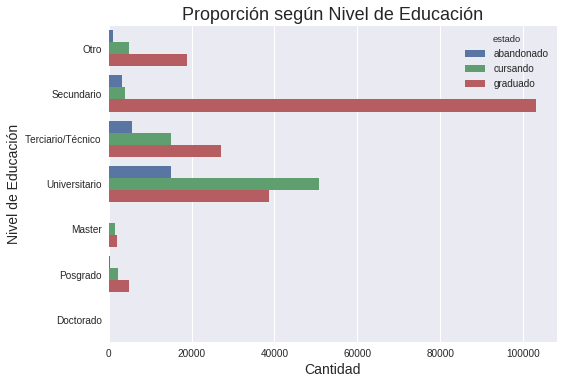

In [36]:
# Grafico de porcentaje de nivel de educación de los postulantes
postulantes['nivel_educacion'] = ( postulantes['nivel_educacion'].cat
                                              .reorder_categories([
                                              'Otro',
                                              'Secundario',
                                              'Terciario/Técnico',
                                              'Universitario',
                                              'Master',
                                              'Posgrado',
                                              'Doctorado'], ordered=True) )
    
postulantes['estado'] = ( postulantes['estado'].cat.rename_categories(
                                                {'Abandonado':'abandonado',
                                                 'En Curso':'cursando',
                                                 'Graduado':'graduado'})
                                             .cat.reorder_categories([
                                                  'abandonado',
                                                  'cursando',
                                                  'graduado'], ordered=True) )
educacion = postulantes[['nivel_educacion','estado']].dropna().copy() 

sns.countplot(y='nivel_educacion',hue='estado',data=educacion,
             order=educacion['nivel_educacion'].cat.categories)
# nivel_educacion.plot(kind = 'barh', legend=True);

plt.xlabel("Cantidad", fontsize=14)
plt.ylabel("Nivel de Educación", fontsize=14)
plt.title("Proporción según Nivel de Educación", fontsize=18)
plt.tight_layout()

Pero hay que tener cuidado con estos resultados, porque hay postulantes repetidos.

In [0]:
def reset_index(df):
  "Devuelve un DataFrame con el indice como columnas"
  '''
  Parameters
  ----------
  df DataFrame
  
  Returns
  ------
  df DataFrame
  '''
  index_df = df.index.to_frame(index=False)
  df = df.reset_index(drop=True)
  
  return pd.merge(index_df,df,left_index=True,right_index=True)

In [0]:
# postulantes.duplicated(subset=['id_postulante','nivel_educacion','estado']).sum()
estado_educacion = postulantes[['id_postulante',
                                'nivel_educacion',
                                'estado']].dropna()
estado_educacion['dummy'] = 1
estado_educacion = (pd.pivot_table(estado_educacion,
                                   index=['id_postulante','nivel_educacion'],
                                   columns='estado')['dummy'].notnull())
                                 
estado_educacion =  estado_educacion.query('abandonado or cursando or graduado')

Para cada postulante elegimos el mayor nivel educativo del que se haya graduado

In [36]:
#: Postulantes que abandonaron estan cursando y graduados
postulantes_acg = (estado_educacion.query('abandonado and cursando and graduado')
                           .sort_index())
print(postulantes_acg)
#Verifico que no haya postulantes que tengan estado ACG para mas de un nivel
postulantes_acg.groupby(level=0).sum().query('(abandonado > 1) or (cursando > 1) or (graduado > 1)')

estado                           abandonado  cursando  graduado
id_postulante nivel_educacion                                  
0zBkobr       Universitario            True      True      True
0zNo8eq       Universitario            True      True      True
0zPYbPq       Universitario            True      True      True
12GpEB        Terciario/Técnico        True      True      True
12RmXL        Terciario/Técnico        True      True      True
...                                     ...       ...       ...
zv8Rb3K       Universitario            True      True      True
zvPdjl8       Universitario            True      True      True
zvavwZK       Universitario            True      True      True
zvawABm       Universitario            True      True      True
zvxWkWb       Terciario/Técnico        True      True      True

[332 rows x 3 columns]


estado,abandonado,cursando,graduado
id_postulante,,,
YlMLGD,2.0,2.0,2.0


In [37]:
# Revisamos los datos del postulante con más de un nivel_educacion en todos los estados
print(postulantes_acg.query('id_postulante == "YlMLGD"'),'\n')
print(postulantes.query('id_postulante == "YlMLGD"')
                 .sort_values(by=['nivel_educacion','estado']))

estado                           abandonado  cursando  graduado
id_postulante nivel_educacion                                  
YlMLGD        Terciario/Técnico        True      True      True
              Universitario            True      True      True 

    id_postulante    nivel_educacion      estado fecha_nacimiento sexo
790        YlMLGD               Otro    cursando       1974-11-24  FEM
794        YlMLGD               Otro    graduado       1974-11-24  FEM
797        YlMLGD  Terciario/Técnico  abandonado       1974-11-24  FEM
789        YlMLGD  Terciario/Técnico    cursando       1974-11-24  FEM
792        YlMLGD  Terciario/Técnico    graduado       1974-11-24  FEM
796        YlMLGD      Universitario  abandonado       1974-11-24  FEM
791        YlMLGD      Universitario    cursando       1974-11-24  FEM
793        YlMLGD      Universitario    graduado       1974-11-24  FEM
795        YlMLGD           Posgrado    graduado       1974-11-24  FEM


Analizamos las distintas combinaciones de estados.

In [39]:
# Generamos 
postulantes_ac = (estado_educacion.query('abandonado and cursando and not graduado')
                           .sort_index())

postulantes_cg = (estado_educacion.query('cursando and graduado and not abandonado')
                           .sort_index())

postulantes_ag = (estado_educacion.query('abandonado and graduado and not cursando')
                           .sort_index())

# print(postulantes_ac,
#       postulantes_ag,
#       postulantes_cg,
#       sep='\n')

estado                         abandonado  cursando  graduado
id_postulante nivel_educacion                                
0zBAmJ9       Universitario          True      True     False
0zBD0eM       Universitario          True      True     False
0zBDxOY       Universitario          True      True     False
0zBKlBa       Universitario          True      True     False
0zBLm5r       Universitario          True      True     False
...                                   ...       ...       ...
zvxdj06       Universitario          True      True     False
zvxldlm       Universitario          True      True     False
zvxrdWE       Universitario          True      True     False
zvxvYzJ       Universitario          True      True     False
zvxwpEb       Universitario          True      True     False

[4009 rows x 3 columns]
estado                           abandonado  cursando  graduado
id_postulante nivel_educacion                                  
0zBMB1r       Terciario/Técnico        Tr

In [40]:
def filtrar_por_estado_nivel_educativo(postulantes):
    return (postulantes.groupby('id_postulante')
                       .agg('count') 
                       .query('abandonado > 1'))

cuentas_ac = filtrar_por_estado_nivel_educativo(postulantes_ac)
cuentas_ag = filtrar_por_estado_nivel_educativo(postulantes_ag)
cuentas_cg = filtrar_por_estado_nivel_educativo(postulantes_cg)

    
print(postulantes.query('id_postulante in @cuentas_ac.index')
                 .sort_values(by=['id_postulante','nivel_educacion','estado']),'\n')
print(postulantes.query('id_postulante in @cuentas_ag.index')
                 .sort_values(by=['id_postulante','nivel_educacion','estado']),'\n')
print(postulantes.query('id_postulante in @cuentas_cg.index')
                 .sort_values(by=['id_postulante','nivel_educacion','estado']))

       id_postulante    nivel_educacion      estado fecha_nacimiento sexo
175582       1Qd2KNb  Terciario/Técnico  abandonado       1994-01-10  FEM
175580       1Qd2KNb  Terciario/Técnico    cursando       1994-01-10  FEM
175581       1Qd2KNb      Universitario  abandonado       1994-01-10  FEM
175579       1Qd2KNb      Universitario    cursando       1994-01-10  FEM
84643        1QrR35E               Otro  abandonado       1993-05-24  FEM
...              ...                ...         ...              ...  ...
217125       mz5WDz1         Secundario    graduado       1992-11-29  FEM
217126       mz5WDz1  Terciario/Técnico  abandonado       1992-11-29  FEM
217124       mz5WDz1  Terciario/Técnico    cursando       1992-11-29  FEM
217127       mz5WDz1      Universitario  abandonado       1992-11-29  FEM
217123       mz5WDz1      Universitario    cursando       1992-11-29  FEM

[42 rows x 5 columns] 

       id_postulante    nivel_educacion      estado fecha_nacimiento  sexo
9833        

Acá hay que filtrar los resultados sobre los que tenemos un conocimiento determinista sobre la educación.
Por ejemplo alguien que tenga un estado: 

nivel_educacion | estado
--: | --:
Master | Abandonado
Master | Cursando

Cómo decidimos si la primera vez que se registró abandonó los estudios y después se registró cuando retomó. O si primero estaba cursando y luego abandonó.

Por lo que tenemos que definir un criterio de selección: 
- Primero tomamos los graduados y elegimos el mayor nivel de educacion.

`multiple_nivel.query('graduado')
              .groupby(level=0,as_index=False)
              .nth(-1)`

el *groupby(level=0)* agrupa por el primer nivel del multiindice 

- Luego tomamos los que estan cursando, no abandonaron y no estan graduados. Y seleccionamos el mayor nivel de educacion.


`multiple_nivel.query('cursando 
                      and not abandonado 
                      and not graduado')
              .groupby(level=0,as_index=False)
              .nth(-1)
`

- Selececcionamos los postulantes restantes, y seleccionamos el anteultimo nivel de educacion.

In [47]:
#Primero vemos los que solo tienen un unico nivel de educacion
un_solo_nivel = estado_educacion.groupby(level=0).count().query('abandonado == 1')
cantidad_postulantes = estado_educacion.groupby(level=0).count().shape


estado_un_solo_nivel = estado_educacion.query('id_postulante in @un_solo_nivel.index')
multiple_nivel = estado_educacion.query('id_postulante not in @un_solo_nivel.index')

print('Hay {:d} filas de postulantes'.format(estado_educacion.shape[0]))
print('Hay {:d} filas de postulantes con un unico nivel educativo'.format(estado_un_solo_nivel.shape[0]))
print('Hay {:d} filas de postulantes con varios niveles'.format(multiple_nivel.shape[0]))



graduados = ( multiple_nivel.query('graduado')
                            .groupby(level=0,as_index=False)
                            .nth(-1) )

cursando =  ( multiple_nivel.query('id_postulante not in @graduados.index \
                                   and ( cursando and not abandonado and not graduado )')
                            .groupby(level=0,as_index=False)
                            .nth(-1) )

# Seleccionamos el anteultimo nivel educativo de los postulantes restantes
restantes = ( multiple_nivel.query('id_postulante not in @graduados.index \
                                    and id_postulante not in @cursando.index')
                            .groupby(level=0,as_index=False)
                            .nth(-2) )

tamanios = tuple(set_.shape[0] for set_ in [graduados,cursando,restantes])

print('Hay {tamanios[0]} filas de graduados,\n\
    {tamanios[1]} filas de postulantes cursando,\n\
    {tamanios[2]} filas restantes.\n'.format(tamanios=tamanios))
print('Lo que da un total de {} filas'.format(sum(tamanios)))

ultimo_estado_educacion = pd.concat([estado_un_solo_nivel,
                                    cursando,graduados,restantes],axis=0)


unico_estado_educacion = ( ultimo_estado_educacion.stack(level=-1)
                               .reset_index()
                               .rename(columns={0:'values'})
                               .query('values')
                               .drop(columns='values'))

print('El dataset final tiene un total de {}\
filas de postulantes unicos'.format(unico_estado_educacion.shape[0]))

Hay 283339 filas de postulantes
Hay 113296 filas de postulantes con un unico nivel educativo
Hay 170043 filas de postulantes con varios niveles
Hay 72987 filas de graduados,
    38520 filas de postulantes cursando,
    75456 filas restantes.

Lo que da un total de 186963 filas
El dataset final tiene un total de 313078filas de postulantes unicos


En este último analisis vemos que no estamos filtrando los postulantes de manera correcta ya que el número 
final es mayor al inicial cuando esperabamos reducirlo.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


(0, 108260.25)

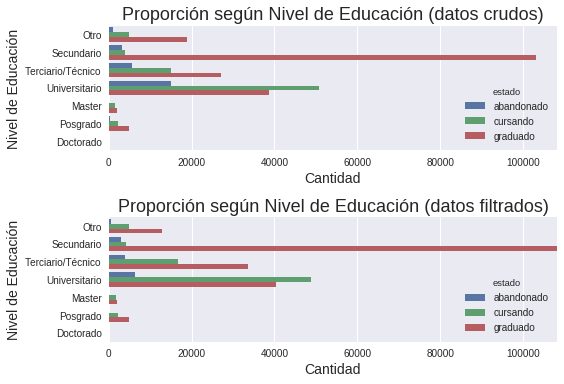

In [48]:
plt.subplot(2,1,1)
ax1 = sns.countplot(y='nivel_educacion',hue='estado',data=educacion,
             order=educacion['nivel_educacion'].cat.categories)
# nivel_educacion.plot(kind = 'barh', legend=True);

plt.xlabel("Cantidad", fontsize=14)
plt.ylabel("Nivel de Educación", fontsize=14)
plt.title("Proporción según Nivel de Educación (datos crudos)", fontsize=18)
plt.tight_layout()
#ax1.set_xscale('log')

plt.subplot(2,1,2)
ax2 = sns.countplot(y='nivel_educacion',hue='estado',data=unico_estado_educacion,
             order=unico_estado_educacion['nivel_educacion'].cat.categories)
# nivel_educacion.plot(kind = 'barh', legend=True);

plt.xlabel("Cantidad", fontsize=14)
plt.ylabel("Nivel de Educación", fontsize=14)
plt.title("Proporción según Nivel de Educación (datos filtrados)", fontsize=18)
plt.tight_layout() 
#ax2.set_xscale('log')

ax_lim = max(ax1.get_xlim()[1],ax1.get_xlim()[1])
ax1.set_xlim((0,ax_lim))
ax2.set_xlim((0,ax_lim))

### 2.3 Sexo

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: sexo, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


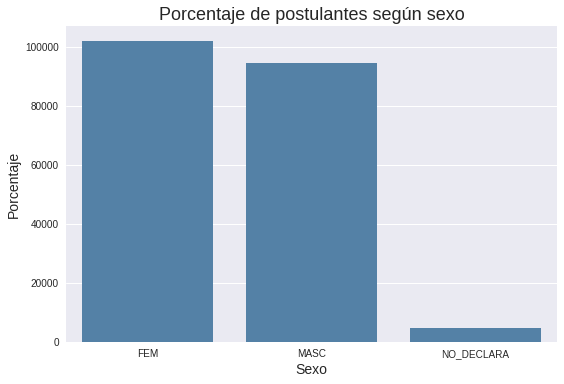

In [41]:
sexo_postulantes = postulantes[['id_postulante','sexo']].drop_duplicates()
# Verificamos de que no exista postulante multiples declaraciones de sexo
sexo_postulantes['id_postulante'].value_counts(sort=True,ascending=False)

# Graficamos la cantidad de postulantes por sexo

sns.countplot(x='sexo',data=sexo_postulantes,color='SteelBlue')
print(sexo_postulantes['sexo'].value_counts())
plt.xlabel("Sexo", fontsize=14)
plt.ylabel("Porcentaje", fontsize=14)
plt.title("Porcentaje de postulantes según sexo", fontsize=18)
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


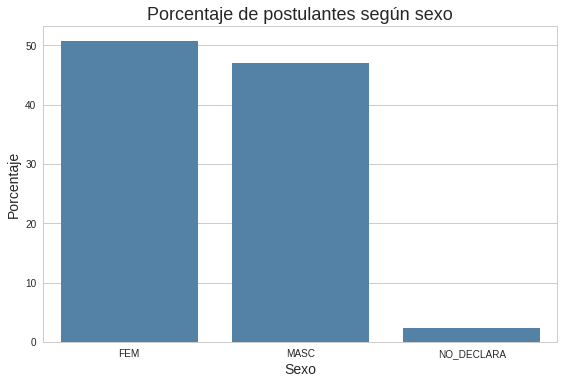

In [50]:
# Porcentaje de sexo de los postulantes

porcentaje_sexo_postulantes = sexo_postulantes.groupby(sexo_postulantes.sexo, as_index = False).size().reset_index(name='suma')

porcentaje_sexo_postulantes['porcentaje'] = (porcentaje_sexo_postulantes['suma'] * 100.)/(porcentaje_sexo_postulantes['suma'].sum())

sns.set_style("whitegrid")
sns.barplot(x='sexo', y='porcentaje', data=porcentaje_sexo_postulantes, color = "SteelBlue")


### 2.3 Edad vs sexo

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


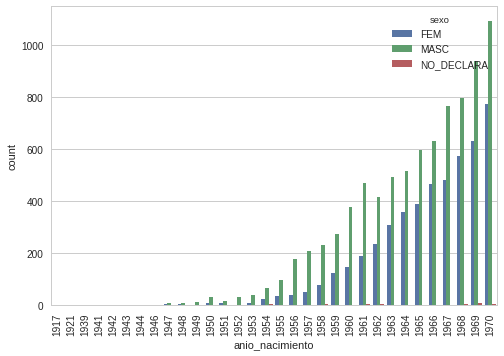

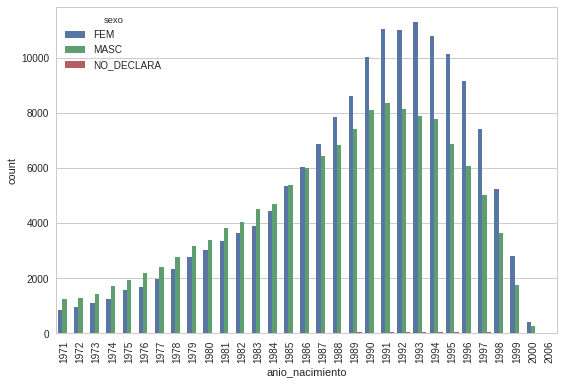

In [51]:
anio_nacimiento_sexo = (postulantes[['fecha_nacimiento','sexo']]
                                  .query('fecha_nacimiento > "1900-01-01" ')
                                  .copy())
anio_nacimiento_sexo['anio_nacimiento'] = ( anio_nacimiento_sexo['fecha_nacimiento']
                                             .dt.year )

#   plt.subplot(1,2,1)
sns.countplot(x='anio_nacimiento',hue='sexo',data=anio_nacimiento_sexo
                                                  .query('anio_nacimiento <= 1970'))
plt.xticks(rotation=90)
#   plt.subplot(1,2,2)
plt.show()
sns.countplot(x='anio_nacimiento',hue='sexo',data=anio_nacimiento_sexo
                                                  .query('anio_nacimiento > 1970'))
plt.xticks(rotation=90)

plt.tight_layout()

**CONCLUSIÓN** Vemos como los máximos de busquedas laborales se encuentral alrededor de los 25 años, una edad que prodríamos relacionar con la finalización de una carrera universitaria. Es importante notar la diferencia entre la cantidad de los postulantes de distinto sexo.

**OBSERVACIÓN** Vemos que la cantidad de "no_declara"es muy baja respecto a femenino y masculino. Para ver en mejor detalle sobre como se comportan, analizamos aparte la cantidad de "no_declara""



In [38]:
sns.countplot(x='anio_nacimiento',data=anio_nacimiento_sexo.query('sexo == "NO_DECLARA"'),\
             color='SteelBlue')
plt.xticks(rotation=90)

NameError: ignored

**CONCLUSIÓN** El comportamiento sigue siendo similar al del gráfico anterior pero es más ruidoso debido al menor número de datos.

### Educacion vs sexo

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


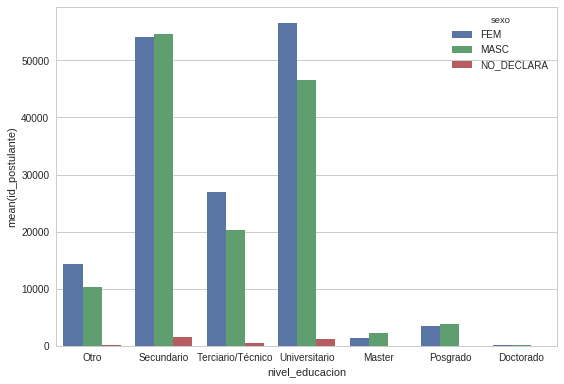

In [53]:
postulantes_ed_sexo = postulantes[['id_postulante','sexo','nivel_educacion']].groupby(['sexo','nivel_educacion'],as_index=False).count()
ax = sns.barplot(x='nivel_educacion',y='id_postulante',hue='sexo',data=postulantes_ed_sexo,
                order=educacion['nivel_educacion'].cat.categories)
# ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.tight_layout()

**CONCLUSION** Las personas que mas aplican son las que menor educacion tienen. Entonces nos preguntamos: **es importante un master, doctorado o posgrado para asegurar el trabajo?** 

Notamos una gran concentración en Secundario y Universitario 

### Buscamos: Que número de postulantes están tanto en las visitas como en las postulaciones.


In [55]:
postulaciones['id_postulante'].isin(visitas['id_postulante']).value_counts()

False    1772607
True     1629016
Name: id_postulante, dtype: int64

A partir de este momento la cantidad de descripción en los análisis se reduce por una falta de tiempo :P.  

**Pregunta :** ¿es necesario visitar el artículo para postularme?

### Agrupamos id_postulante por id_aviso


In [56]:
(postulaciones.groupby(['id_aviso','id_postulante'])
              .count()
              .sort_values(by='fecha_postulacion',ascending=False))

fecha_postulacion  timestamp_postulacion  \
id_aviso   id_postulante                                             
1112349911 NzrBbLz                       15                     15   
1112306414 Z9NaRY                        14                     14   
1112138138 0zP39rY                        8                      8   
1112283417 xk9PE20                        8                      8   
1112128194 4rWj0X5                        8                      8   
...                                     ...                    ...   
1112270865 96XrZL5                        1                      1   
           96zk9Pw                        1                      1   
           A3A4AG5                        1                      1   
           A3R64oG                        1                      1   
1112370500 owEJwR4                        1                      1   

                          horario_postulacion  
id_aviso   id_postulante                       
1112349911 NzrBbLz                         15  
1112306414 Z9NaRY                          14  
1112138138 0zP39rY                          8  
1112283417 xk9PE20                          8  
1112128194 4rWj0X5                          8  
...                                       ...  
1112270865 96XrZL5                          1  
           96zk9Pw                          1  
           A3A4AG5                          1  
           A3R64oG                          1  
1112370500 owEJwR4                          1  

[3401262 rows x 3 columns]

### Buscamos saber si hay multiples visitas por id_postulante y fecha_visita

In [57]:
visitas_multiples = ( visitas.groupby(['id_aviso','id_postulante'], as_index = False)
                            .count()
                            .sort_values(by='fecha_visita',ascending=False) )
visitas_multiples = visitas_multiples[visitas_multiples['fecha_visita'] > 1]

visitas_fechas = ( visitas.merge(visitas_multiples, 
                               left_on=['id_aviso','id_postulante'],
                               right_on=['id_aviso','id_postulante'],
                               how='inner') )
visitas_fechas = visitas_fechas.drop(columns='fecha_visita_y')
visitas_fechas.groupby(by=['id_aviso','id_postulante']).agg(['min','max'])

fecha_visita_x                  timestamp_visita_x  \
                                    min         max                     min   
id_aviso   id_postulante                                                      
2613010    aNJ3vq            2018-02-26  2018-02-26 2018-02-26 22:21:03.274   
12543760   0zBKjrv           2018-02-26  2018-02-26 2018-02-26 14:31:26.588   
           0zk3Rwr           2018-02-28  2018-02-28 2018-02-28 15:08:54.415   
           1QrGNPQ           2018-02-26  2018-02-26 2018-02-26 11:04:14.882   
           1QrJ6QB           2018-02-26  2018-02-26 2018-02-26 01:14:35.770   
...                                 ...         ...                     ...   
1112370471 xk9VWB0           2018-03-01  2018-03-01 2018-03-01 03:12:08.526   
           zv8EwJk           2018-03-01  2018-03-01 2018-03-01 02:44:33.242   
           zv8eBO8           2018-03-01  2018-03-01 2018-03-01 02:34:12.262   
           zvaZlE3           2018-03-01  2018-03-01 2018-03-01 04:20:43.608   
           zvxbwNE           2018-03-01  2018-03-01 2018-03-01 02:11:12.453   

                                                 horario_visita_x  \
                                             max              min   
id_aviso   id_postulante                                            
2613010    aNJ3vq        2018-02-26 22:23:49.887  22:21:03.274000   
12543760   0zBKjrv       2018-02-26 14:59:52.892  14:31:26.588000   
           0zk3Rwr       2018-02-28 15:09:03.853  15:08:54.415000   
           1QrGNPQ       2018-02-26 11:09:25.434  11:04:14.882000   
           1QrJ6QB       2018-02-26 01:14:37.166  01:14:35.770000   
...                                          ...              ...   
1112370471 xk9VWB0       2018-03-01 03:12:10.695  03:12:08.526000   
           zv8EwJk       2018-03-01 02:44:34.806  02:44:33.242000   
           zv8eBO8       2018-03-01 02:34:14.286  02:34:12.262000   
           zvaZlE3       2018-03-01 04:20:45.212  04:20:43.608000   
           zvxbwNE       2018-03-01 02:11:13.488  02:11:12.453000   

                                          timestamp_visita_y      \
                                      max                min max   
id_aviso   id_postulante                                           
2613010    aNJ3vq         22:23:49.887000                  2   2   
12543760   0zBKjrv        14:59:52.892000                  2   2   
           0zk3Rwr        15:09:03.853000                  3   3   
           1QrGNPQ        11:09:25.434000                  4   4   
           1QrJ6QB        01:14:37.166000                  2   2   
...                                   ...                ...  ..   
1112370471 xk9VWB0        03:12:10.695000                  2   2   
           zv8EwJk        02:44:34.806000                  2   2   
           zv8eBO8        02:34:14.286000                  2   2   
           zvaZlE3        04:20:45.212000                  2   2   
           zvxbwNE        02:11:13.488000                  2   2   

                         horario_visita_y      
                                      min max  
id_aviso   id_postulante                       
2613010    aNJ3vq                       2   2  
12543760   0zBKjrv                      2   2  
           0zk3Rwr                      3   3  
           1QrGNPQ                      4   4  
           1QrJ6QB                      2   2  
...                                   ...  ..  
1112370471 xk9VWB0                      2   2  
           zv8EwJk                      2   2  
           zv8eBO8                      2   2  
           zvaZlE3                      2   2  
           zvxbwNE                      2   2  

[209173 rows x 10 columns]

In [58]:
visitas_fechas.count()

id_aviso              578771
fecha_visita_x        578771
id_postulante         578771
timestamp_visita_x    578771
horario_visita_x      578771
timestamp_visita_y    578771
horario_visita_y      578771
dtype: int64

In [59]:
# with pd.option_context('display.max_rows', 20):
visitas[(visitas['id_aviso'] == 1112334789) &	(visitas['id_postulante'] == 'VNeZ482')].sort_values(by='fecha_visita')

,id_aviso,fecha_visita,id_postulante,timestamp_visita,horario_visita
79309,1112334789,2018-02-24,VNeZ482,2018-02-24 12:53:51.953,12:53:51.953000
85091,1112334789,2018-02-24,VNeZ482,2018-02-24 12:54:53.503,12:54:53.503000
85090,1112334789,2018-02-24,VNeZ482,2018-02-24 12:54:53.427,12:54:53.427000
85089,1112334789,2018-02-24,VNeZ482,2018-02-24 12:54:53.401,12:54:53.401000
85086,1112334789,2018-02-24,VNeZ482,2018-02-24 12:54:39.292,12:54:39.292000
...,...,...,...,...,...
82986,1112334789,2018-02-24,VNeZ482,2018-02-24 12:54:27.654,12:54:27.654000
82984,1112334789,2018-02-24,VNeZ482,2018-02-24 12:54:24.308,12:54:24.308000
82983,1112334789,2018-02-24,VNeZ482,2018-02-24 12:54:24.300,12:54:24.300000
83253,1112334789,2018-02-24,VNeZ482,2018-02-24 12:54:24.293,12:54:24.293000


Acá vemos que hay varios usuarios que visitan el mismo aviso varias veces, por lo que decidimos ver el período de tiempo en que se vió el anuncio, y en este caso, el postulante vió 116 veces el anuncio en 1 minuto

In [0]:
with pd.option_context('display.max_rows', 20):
  postulaciones[(postulaciones["id_aviso"] == 1112349911)  & (postulaciones["id_postulante"] == "NzrBbLz")]

In [61]:
print('Rango de visitas:\n')
print(visitas['fecha_visita'].agg(['min','max']),'\n')

print('Rango de postulaciones:\n')
print(postulaciones['fecha_postulacion'].agg(['min','max']))

Rango de visitas:

min    2018-02-23
max    2018-03-01
Name: fecha_visita, dtype: object 

Rango de postulaciones:

min    2018-01-15
max    2018-02-28
Name: fecha_postulacion, dtype: object


## REPORTE Global avisos_Detalle
Queremos conocer el comprotamiento de la tabla AVISOS_DETALLE

In [62]:
avisos_detalle.head()

,id_aviso,titulo_aviso,descripcion_aviso,zona_de_trabajo,ciudad,direccion,tipo_de_trabajo,nivel_laboral,nombre_area_laboral,nombre_empresa,esta_activo
0,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,False
1,17903700,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste,False
2,1000150677,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL,False
3,1000610287,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A,True
4,1000872556,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL,False


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

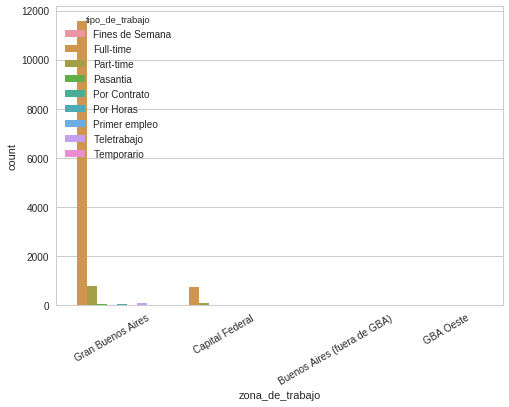

In [63]:

g = sns.countplot(x='zona_de_trabajo',data=avisos_detalle, hue='tipo_de_trabajo')  #hue='nivel_laboral?
plt.xticks(rotation=30)


In [64]:
print (avisos_detalle['tipo_de_trabajo'].value_counts())

Full-time          12339
Part-time            863
Teletrabajo          110
Por Horas             63
Pasantia              63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64


### *Cuáles* son los avisos mas vistos?
Buscamos estudiar cuales son los Avisos más vistos (Sin contar las repeticiones que ocurrieron en un mismo día). Esto es importante dado que nos interesa conocer la PRESENCIA DIARIA DEL USUARIO.

In [67]:
aux2 = visitas[['id_aviso','id_postulante','fecha_visita']].drop_duplicates()
aux = aux2['id_aviso']
aux.value_counts().head()



1112359836    2882
1112363488    2803
1112366909    2327
1112369306    2110
1112355872    2097
Name: id_aviso, dtype: int64

** Cuáles son los postulantes que vieron más avisos? **


In [68]:
aux = aux2['id_postulante']
aux.value_counts().head()

dYJV5K2    585
8MaQjP3    377
8Mrr8dM    271
OqjNZ2x    244
96XNwzw    220
Name: id_postulante, dtype: int64

** ¿A qué aviso se postula más la gente?

In [69]:
aux2 = postulaciones[['id_aviso','id_postulante','fecha_postulacion']].drop_duplicates()
aux = aux2['id_aviso']
aux.value_counts().head()

1112033906    9932
1112334791    9787
1112204682    9244
1112094756    8763
1112345900    8304
Name: id_aviso, dtype: int64

## Estudiamos los periodos de visita
Para ello, analizamos máximo y mínimo de fechas segun id_aviso

In [0]:
def dadoIDavisoDevolverPeriodoVisto(id_aviso):
  return visitas[visitas['id_aviso'] == id_aviso]['fecha_visita'].agg(['min','max'])

In [71]:
dadoIDavisoDevolverPeriodoVisto(1112033906)

min    2018-02-23
max    2018-02-28
Name: fecha_visita, dtype: object

## CREAMOS LA TABLA Postulaciones_genero_edad_postulaciones_con_detalle : merge dePOSTULANTES_GENERO, POSTULACIONES y AVISOS_DETALLES


In [74]:
#Armamos el merge
postulantes_genero_edad_postulaciones  =  pd.merge( postulantes_genero_edad, postulaciones,  how = 'inner' ,  on = [ 'id_postulante'])
postulantes_genero_edad_postulaciones_con_detalle  =  pd.merge( postulantes_genero_edad_postulaciones, avisos_detalle, how = 'inner' ,  on = [ 'id_aviso'])

#TIME Split

#Separamos Date y Time
temp2 = pd.DatetimeIndex(postulantes_genero_edad_postulaciones_con_detalle['fecha_postulacion'])
postulantes_genero_edad_postulaciones_con_detalle['Date'] = temp2.date
postulantes_genero_edad_postulaciones_con_detalle['Time'] = temp2.time

#Generamos una columna con los DIAS DE Date
postulantes_genero_edad_postulaciones_con_detalle['Date'] = pd.to_datetime(postulantes_genero_edad_postulaciones_con_detalle['Date'])
postulantes_genero_edad_postulaciones_con_detalle['day_of_week'] = postulantes_genero_edad_postulaciones_con_detalle['Date'].dt.weekday_name

#Agregamos una columna EDAD
postulantes_genero_edad_postulaciones_con_detalle['edad']=  (2018 - postulantes['fecha_nacimiento'].dt.year)

#Imprimo
postulantes_genero_edad_postulaciones_con_detalle.head(1)



,id_postulante,fecha_nacimiento,sexo,id_aviso,fecha_postulacion,timestamp_postulacion,horario_postulacion,titulo_aviso,descripcion_aviso,zona_de_trabajo,...,direccion,tipo_de_trabajo,nivel_laboral,nombre_area_laboral,nombre_empresa,esta_activo,Date,Time,day_of_week,edad
0,NM5M,1970-12-03,FEM,1112257047,2018-01-15,2018-01-15 16:22:34,16:22:34,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,...,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,False,2018-01-15,00:00:00,Monday,49.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


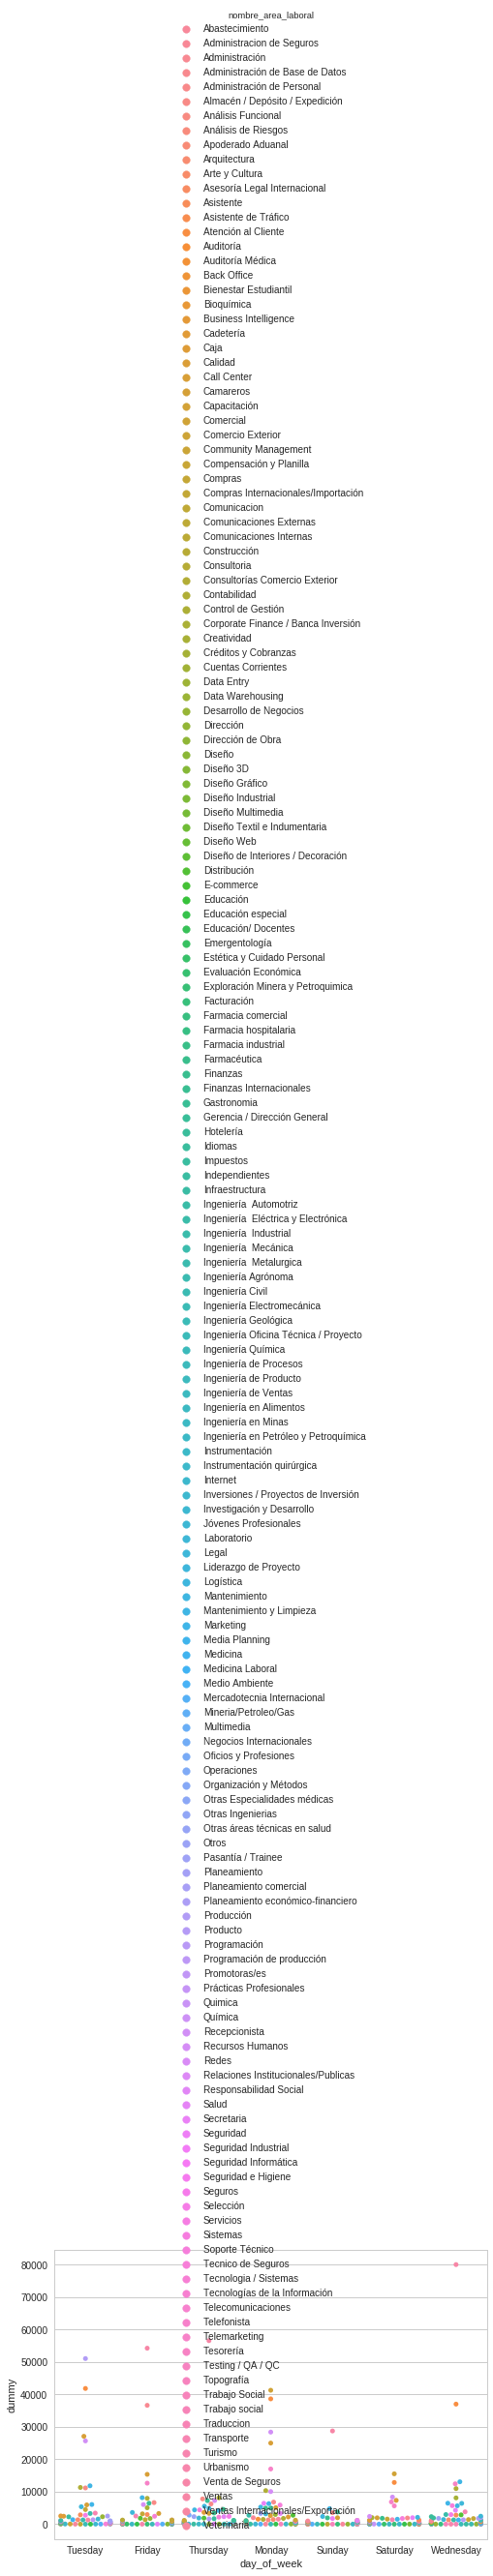

In [77]:
df = postulantes_genero_edad_postulaciones_con_detalle[['nombre_area_laboral',
                                                             'day_of_week']]
df['dummy'] = 1 #agrego columna para poder agrupar
df = df.groupby(by=['day_of_week','nombre_area_laboral'],as_index=False).count()

df2 = df.sample(n=500)
ploti = sns.swarmplot(x='day_of_week',y='dummy',hue='nombre_area_laboral', data=df2)

In [78]:
#Reviso el dtype de la columna "day_of_week"
print(postulantes_genero_edad_postulaciones_con_detalle.dtypes)

id_postulante                object
fecha_nacimiento     datetime64[ns]
sexo                       category
id_aviso                      int64
fecha_postulacion            object
                          ...      
esta_activo                    bool
Date                 datetime64[ns]
Time                         object
day_of_week                  object
edad                        float64
Length: 21, dtype: object


Veo que "day_of_week"es **object** busco ahora, que sea **categorical** para trabajar con Swarmplot ;) en el proximo punto.

In [79]:
#Convierto "day_of_week"de *objeto* a *category*
postulantes_genero_edad_postulaciones_con_detalle["day_of_week"] = postulantes_genero_edad_postulaciones_con_detalle["day_of_week"].astype('category')

#verifico conversion
print(postulantes_genero_edad_postulaciones_con_detalle.dtypes)


id_postulante                object
fecha_nacimiento     datetime64[ns]
sexo                       category
id_aviso                      int64
fecha_postulacion            object
                          ...      
esta_activo                    bool
Date                 datetime64[ns]
Time                         object
day_of_week                category
edad                        float64
Length: 21, dtype: object


## Contar la cantidad de postulaciones a nombre_area_Laboral por day_of _week
Buscamos saber la cantidad para luego representarlo y asi entender el comportamiento de las nombre_areas_laboral durante los dias de la semana.

In [80]:
#postulantes_genero_edad_postulaciones_con_detalle['nombre_area_laboral'].value_counts
postulantes_agrupados_1 = postulantes_genero_edad_postulaciones_con_detalle.groupby(['nombre_area_laboral'],as_index=True).count()["id_postulante"].sort_values(ascending=False)
postulantes_agrupados_1.head(20)


nombre_area_laboral
Ventas                        408148
Administración                291135
Producción                    277089
Comercial                     216677
Atención al Cliente           195636
                               ...  
Logística                      37139
Administración de Personal     37011
Créditos y Cobranzas           36690
Marketing                      29861
Legal                          29295
Name: id_postulante, Length: 20, dtype: int64

## ANALISIS ESTADISTICO

1) corr() toda variables numericas deben ser
https://github.com/afolaborn/Python_Jupyter_Notebook/blob/master/Correlation/Correlation_Matrix_Upload.ipynb

In [82]:
postulantes_genero_edad_postulaciones_con_detalle.head(1)




,id_postulante,fecha_nacimiento,sexo,id_aviso,fecha_postulacion,timestamp_postulacion,horario_postulacion,titulo_aviso,descripcion_aviso,zona_de_trabajo,...,direccion,tipo_de_trabajo,nivel_laboral,nombre_area_laboral,nombre_empresa,esta_activo,Date,Time,day_of_week,edad
0,NM5M,1970-12-03,FEM,1112257047,2018-01-15,2018-01-15 16:22:34,16:22:34,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,...,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,False,2018-01-15,00:00:00,Monday,49.0


In [83]:
df = postulantes_genero_edad_postulaciones_con_detalle[['nombre_area_laboral',
                                                             'day_of_week']]
df.head(5)

,nombre_area_laboral,day_of_week
0,Atención al Cliente,Monday
1,Atención al Cliente,Sunday
2,Atención al Cliente,Monday
3,Atención al Cliente,Tuesday
4,Atención al Cliente,Tuesday


# Gráficos con ALTAIR

In [84]:
postulaciones.head(2)

,id_aviso,id_postulante,fecha_postulacion,timestamp_postulacion,horario_postulacion
0,1112257047,NM5M,2018-01-15,2018-01-15 16:22:34,16:22:34
1,1111920714,NM5M,2018-02-06,2018-02-06 09:04:50,09:04:50


In [85]:
#Agrego columna con DIA de postulacion
postulaciones['day_of_week'] = postulaciones['timestamp_postulacion'].dt.weekday_name
postulaciones.head(2)

,id_aviso,id_postulante,fecha_postulacion,timestamp_postulacion,horario_postulacion,day_of_week
0,1112257047,NM5M,2018-01-15,2018-01-15 16:22:34,16:22:34,Monday
1,1111920714,NM5M,2018-02-06,2018-02-06 09:04:50,09:04:50,Tuesday


In [86]:
df = postulaciones[['timestamp_postulacion']].dropna()
df['cantidad'] = 1
df

,timestamp_postulacion,cantidad
0,2018-01-15 16:22:34,1
1,2018-02-06 09:04:50,1
2,2018-02-22 09:04:47,1
3,2018-02-22 09:04:59,1
4,2018-01-25 18:55:03,1
...,...,...
3401618,2018-02-28 23:54:44,1
3401619,2018-02-28 23:57:43,1
3401620,2018-02-28 23:52:13,1
3401621,2018-02-28 23:59:06,1


In [87]:
df['fecha_de_postulacion'] = df['timestamp_postulacion'].dt.date
df['horario_de_postulacion'] = df['timestamp_postulacion'].dt.hour
df['dia_de_semana'] = df['timestamp_postulacion'].dt.weekday_name
df

,timestamp_postulacion,cantidad,fecha_de_postulacion,horario_de_postulacion,dia_de_semana
0,2018-01-15 16:22:34,1,2018-01-15,16,Monday
1,2018-02-06 09:04:50,1,2018-02-06,9,Tuesday
2,2018-02-22 09:04:47,1,2018-02-22,9,Thursday
3,2018-02-22 09:04:59,1,2018-02-22,9,Thursday
4,2018-01-25 18:55:03,1,2018-01-25,18,Thursday
...,...,...,...,...,...
3401618,2018-02-28 23:54:44,1,2018-02-28,23,Wednesday
3401619,2018-02-28 23:57:43,1,2018-02-28,23,Wednesday
3401620,2018-02-28 23:52:13,1,2018-02-28,23,Wednesday
3401621,2018-02-28 23:59:06,1,2018-02-28,23,Wednesday


In [0]:
#Agrupo 
df_gb_1 = df[['dia_de_semana', 'horario_de_postulacion', 'cantidad']].groupby(by =['dia_de_semana', 'horario_de_postulacion'], as_index=False).count()

df_gb_1['dia_de_semana'] = (df_gb_1['dia_de_semana'].astype('category').cat.reorder_categories(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True))

In [89]:
# Quiero por dia y hora ver la cantidad de postulacion
# https://altair-viz.github.io/gallery/table_bubble_plot_github.html
alt.Chart(df_gb_1).mark_rect().encode(
    alt.Y('dia_de_semana:O'),
    alt.X('horario_de_postulacion:O'),
    size='cantidad:Q', 
    color='cantidad:Q'
    
   
).properties(
    title="Cantidad Postulaciones por dia y hora,"
)

Chart({
  data:     dia_de_semana  horario_de_postulacion  cantidad
  0          Friday                       0      5668
  1          Friday                       1      3531
  2          Friday                       2      2128
  3          Friday                       3      1979
  4          Friday                       4      2523
  ..            ...                     ...       ...
  163     Wednesday                      19     28426
  164     Wednesday                      20     26901
  165     Wednesday                      21     25344
  166     Wednesday                      22     19979
  167     Wednesday                      23     14155
  
  [168 rows x 3 columns],
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'cantidad:Q'
    }),
    size: Size({
      shorthand: 'cantidad:Q'
    }),
    x: X({
      shorthand: 'horario_de_postulacion:O'
    }),
    y: Y({
      shorthand: 'dia_de_semana:O'
    })
  }),
  mark: 'rect',
  title: 'Cantidad Postulaciones por dia y hora,'
})

**CONCLUSION** : Vemos que entre las 6 am y 12 am hay mayor cantidad de postulaciones para todos los dias. Los dias Lunes , martes y miercoles se extiende en menor medidad hasta las 21 hs. 

Los fin de semana, las postulaciones decaen, lo cual es logico.

**OBSERVACION** No logramos ordenar por dia cronologicamente. La libreria lo ordena por orden alfabetico :( 

In [90]:
visitas.head(2)

,id_aviso,fecha_visita,id_postulante,timestamp_visita,horario_visita
0,1111780242,2018-02-23,YjVJQ6Z,2018-02-23 18:38:13.187,18:38:13.187000
1,1112263876,2018-02-23,BmVpYoR,2018-02-23 18:38:14.296,18:38:14.296000


In [91]:
df_2 = visitas[['timestamp_visita']]
df_2['timestamp_visita'] = df_2['timestamp_visita'].dt.floor('h')
df_2['cantidad'] = 1

df_2 = df_2.groupby(by='timestamp_visita',as_index=False).count()
df_2['hora_visita'] = df_2['timestamp_visita'].dt.hour
df_2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,timestamp_visita,cantidad,hora_visita
0,2018-02-23 18:00:00,3919,18
1,2018-02-23 19:00:00,10370,19
2,2018-02-23 20:00:00,9644,20
3,2018-02-23 21:00:00,9081,21
4,2018-02-23 22:00:00,7181,22
...,...,...,...
126,2018-03-01 00:00:00,9830,0
127,2018-03-01 01:00:00,9810,1
128,2018-03-01 02:00:00,9283,2
129,2018-03-01 03:00:00,7163,3


In [92]:
line = alt.Chart().mark_line().encode(
    alt.X('timestamp_visita:T'),
    y='cantidad:Q',
    opacity=alt.value(0.3)
    
     )

points = alt.Chart().mark_point().encode(
    alt.X('timestamp_visita:T'),
    y='cantidad:Q',
         )

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['timestamp_visita'], empty='none')


# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='timestamp_visita:Q',
    opacity=alt.value(0),
).properties(
    selection=nearest
)

# Draw points on the line, and highlight based on selection
# points = line.mark_point().encode(
#     opacity=alt.condition(nearest, alt.value(1), alt.value(0))
# )

#Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'hora_visita:O', alt.value(' '))
)


# Put the five layers into a chart and bind the data
alt.layer(line, selectors, text, points,
          data=df_2, width=600, height=300)

LayerChart({
  data:        timestamp_visita  cantidad  hora_visita
  0   2018-02-23 18:00:00      3919           18
  1   2018-02-23 19:00:00     10370           19
  2   2018-02-23 20:00:00      9644           20
  3   2018-02-23 21:00:00      9081           21
  4   2018-02-23 22:00:00      7181           22
  ..                  ...       ...          ...
  126 2018-03-01 00:00:00      9830            0
  127 2018-03-01 01:00:00      9810            1
  128 2018-03-01 02:00:00      9283            2
  129 2018-03-01 03:00:00      7163            3
  130 2018-03-01 04:00:00      4737            4
  
  [131 rows x 3 columns],
  height: 300,
  layer: [Chart({
    encoding: EncodingWithFacet({
      opacity: OpacityValue({
        value: 0.3
      }),
      x: X({
        shorthand: 'timestamp_visita:T'
      }),
      y: Y({
        shorthand: 'cantidad:Q'
      })
    }),
    mark: 'line'
  }), Chart({
    encoding: EncodingWithFacet({
      opacity: OpacityValue({
        value: 0
      }),
      x: X({
        shorthand: 'timestamp_visita:Q'
      })
    }),
    mark: 'point',
    selection: NamedSelection({
      selector001: SelectionDef({
        empty: 'none',
        fields: ['timestamp_visita'],
        nearest: True,
        on: 'mouseover',
        type: 'single'
      })
    })
  }), Chart({
    encoding: EncodingWithFacet({
      opacity: OpacityValue({
        value: 0.3
      }),
      text: TextValue({
        condition: Text({
          selection: 'selector001',
          shorthand: 'hora_visita:O'
        }),
        value: ' '
      }),
      x: X({
        shorthand: 'timestamp_visita:T'
      }),
      y: Y({
        shorthand: 'cantidad:Q'
      })
    }),
    mark: MarkDef({
      align: 'left',
      dx: 5,
      dy: -5,
      type: 'text'
    })
  }), Chart({
    encoding: EncodingWithFacet({
      x: X({
        shorthand: 'timestamp_visita:T'
      }),
      y: Y({
        shorthand: 'cantidad:Q'
      })
    }),
    mark: 'point'
  })],
  width: 600
})

**CONCLUSION** Notamos que hay hay picos entre las 12 y 15 horas. Esto nos da a entender que la gente aprovecha en este tiempo, para hacer nuevas visitas

**PREGUNTAS QUE NOS HACEMOS** 
0. Que edad tienen los visitantes? Para saber si estan estudiando o tienen un trabajo. 
1. Estaran disconformes con sus actuales trabajos?


# GANTT CHART
Buscamos mostrar la cantidad de visitas hechos en los id_avisos segun el lapso de tiempo que estuvieron en linea. 
**APORTE** Nos brinda informacion acerca de la relevancia que tiene el id_aviso para el publico. Por ejemplo, si vemos que en un lapso corto de tiempo hay alta demanda, podremos indagar sobre la misma y conocer necesidades/perfil del publico.

In [93]:
avisos_mas_visitados = visitas[['id_aviso','timestamp_visita']]
avisos_mas_visitados['cuentas'] = 1 
avisos_mas_visitados = avisos_mas_visitados.groupby(by='id_aviso').agg({'cuentas':'count','timestamp_visita':['min','max']})
avisos_mas_visitados.columns = avisos_mas_visitados.columns.droplevel()
avisos_mas_visitados = avisos_mas_visitados.sort_values(by='count',ascending=False).rename(columns={'count':'cuentas','min':'inicio','max':'final'})
avisos_mas_visitados

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cuentas,inicio,final
id_aviso,,,
1112363488,4169,2018-02-26 20:21:13.738,2018-03-01 04:59:05.098
1112359836,4120,2018-02-23 21:21:44.848,2018-03-01 04:56:08.184
1112352317,4003,2018-02-23 18:38:49.153,2018-03-01 04:57:36.801
1112366909,3669,2018-02-27 21:01:52.663,2018-03-01 04:57:56.526
1112355872,3472,2018-02-23 18:39:38.535,2018-03-01 04:54:06.571
...,...,...,...
1112204743,1,2018-02-25 14:23:05.741,2018-02-25 14:23:05.741
1112204770,1,2018-02-23 19:59:06.778,2018-02-23 19:59:06.778
1112204812,1,2018-02-27 19:33:09.015,2018-02-27 19:33:09.015


In [94]:
# https://altair-viz.github.io/gallery/gantt_chart.html?highlight=gantt%20chart
# opcion b de : https://plot.ly/python/gantt/
avisos = avisos_mas_visitados.head(10);
avisos['label'] = 'A' + avisos.index.map(str) 


bars = alt.Chart(avisos).mark_bar().encode(
    x='inicio:T',
    x2='final:T',
    y=alt.Y('label:N',sort=None),
    color=alt.Color('cuentas:O'),
)

text = alt.Chart(avisos).mark_text(align='left'
                                  ,baseline='middle'
                                  ,fontWeight='bold'
                                  ,dx=5).encode(
    x='inicio:T',
    x2='final:T',
    y=alt.Y('label:N',sort=None),
    text='cuentas',
    color=alt.value('Tomato')
    )

bars + text

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


LayerChart({
  layer: [Chart({
    data:             cuentas                  inicio                   final  \
    id_aviso                                                              
    1112363488     4169 2018-02-26 20:21:13.738 2018-03-01 04:59:05.098   
    1112359836     4120 2018-02-23 21:21:44.848 2018-03-01 04:56:08.184   
    1112352317     4003 2018-02-23 18:38:49.153 2018-03-01 04:57:36.801   
    1112366909     3669 2018-02-27 21:01:52.663 2018-03-01 04:57:56.526   
    1112355872     3472 2018-02-23 18:39:38.535 2018-03-01 04:54:06.571   
    1112344973     3299 2018-02-23 18:39:10.536 2018-03-01 04:58:55.283   
    1112369306     3236 2018-02-28 19:21:15.747 2018-03-01 04:59:08.894   
    1112346591     2979 2018-02-23 18:47:15.850 2018-03-01 04:48:00.740   
    1112345900     2841 2018-02-23 18:40:56.423 2018-03-01 04:59:55.409   
    1112334791     2817 2018-02-23 18:46:35.110 2018-03-01 04:51:05.976   
    
                      label  
    id_aviso                 
    1112363488  A1112363488  
    1112359836  A1112359836  
    1112352317  A1112352317  
    1112366909  A1112366909  
    1112355872  A1112355872  
    1112344973  A1112344973  
    1112369306  A1112369306  
    1112346591  A1112346591  
    1112345900  A1112345900  
    1112334791  A1112334791  ,
    encoding: EncodingWithFacet({
      color: Color({
        shorthand: 'cuentas:O'
      }),
      x: X({
        shorthand: 'inicio:T'
      }),
      x2: X2({
        shorthand: 'final:T'
      }),
      y: Y({
        shorthand: 'label:N',
        sort: None
      })
    }),
    mark: 'bar'
  }), Chart({
    data:             cuentas                  inicio                   final  \
    id_aviso                                                              
    1112363488     4169 2018-02-26 20:21:13.738 2018-03-01 04:59:05.098   
    1112359836     4120 2018-02-23 21:21:44.848 2018-03-01 04:56:08.184   
    1112352317     4003 2018-02-23 18:38:49.153 2018-03-01 04:57:36.801   
    1112366909     3669 2018-02-27 21:01:52.663 2018-03-01 04:57:56.526   
    1112355872     3472 2018-02-23 18:39:38.535 2018-03-01 04:54:06.571   
    1112344973     3299 2018-02-23 18:39:10.536 2018-03-01 04:58:55.283   
    1112369306     3236 2018-02-28 19:21:15.747 2018-03-01 04:59:08.894   
    1112346591     2979 2018-02-23 18:47:15.850 2018-03-01 04:48:00.740   
    1112345900     2841 2018-02-23 18:40:56.423 2018-03-01 04:59:55.409   
    1112334791     2817 2018-02-23 18:46:35.110 2018-03-01 04:51:05.976   
    
                      label  
    id_aviso                 
    1112363488  A1112363488  
    1112359836  A1112359836  
    1112352317  A1112352317  
    1112366909  A1112366909  
    1112355872  A1112355872  
    1112344973  A1112344973  
    1112369306  A1112369306  
    1112346591  A1112346591  
    1112345900  A1112345900  
    1112334791  A1112334791  ,
    encoding: EncodingWithFacet({
      color: ColorValue({
        value: 'Tomato'
      }),
      text: Text({
        shorthand: 'cuentas'
      }),
      x: X({
        shorthand: 'inicio:T'
      }),
      x2: X2({
        shorthand: 'final:T'
      }),
      y: Y({
        shorthand: 'label:N',
        sort: None
      })
    }),
    mark: MarkDef({
      align: 'left',
      baseline: 'middle',
      dx: 5,
      fontWeight: 'bold',
      type: 'text'
    })
  })]
})

In [0]:
#!pip install nbconvert
#!jupyter nbconvert --to pdf TP1.ipynb